# Esercitazione 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt

## Esercizio 2.1: Integration and Importance Sampling

Calcolo l'integrale
$$
I=\int_0^1 f(x)dx=\int_0^1 \frac{\pi}{2}cos(\frac{x}{2}\pi)dx=1
$$
dove $f(x)=\frac{\pi}{2}cos(\frac{x}{2}\pi)$, usando metodi monte carlo:
- uniform sampling
- importance sampling
- accept reject

In [16]:
def f(x):
    y=np.pi/2*np.cos(x*np.pi/2)
    return y

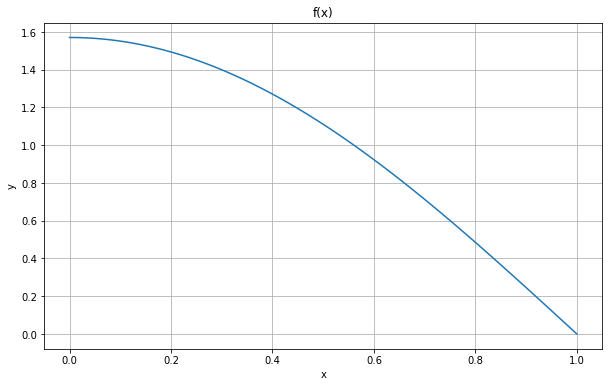

In [19]:
x=np.linspace(0,1,100)
y=f(x)

plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x)")
plt.grid("True")

### Uniform Sampling

x viene generato uniformemente in [0,1]
$$
I=\frac{1}{N}\sum_i^N f(x_i)
$$

L'errore $\epsilon=\frac{\sigma_I}{\sqrt{N}}$. Per valutare l'efficacia e la correttezza del metodo usiamo la statistica a blocchi con 
- $N_{blocks}=100$  (numero di blocchi)
- $N_{throws}=100$  (numero di "lanci" per blocco)
- $N=50000$ (numero di punti per calcolare l'integrale)

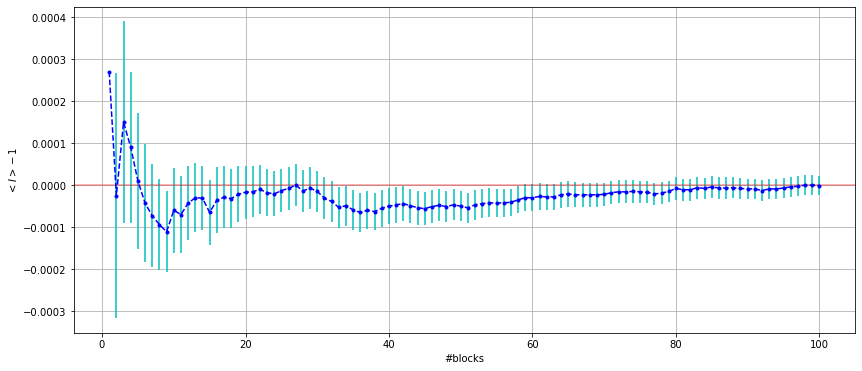

In [37]:
file=open('es1/I_unif_samp.csv')
x,sum_prog, err=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)
N_block=100
plt.figure(figsize=(14,6))
plt.errorbar(x/(np.max(x)/N_block),sum_prog-1,fmt='.--',color='blue',ecolor='c',yerr=err)
plt.xlabel('#blocks')
plt.axhline(0,color='red', alpha=0.4)
plt.ylabel(f'$<I>-1$')
plt.grid(True)
plt.show()

### Importance Sampling

Cambio distribuzione di probabilità $p(x)$ e calcolo la nuova funzione integrale campionata secondo $p(x)$
$$
I=\int_0^1 \frac{f(x)}{p(x)}p(x)dx
$$

La stima dell'integrale sarà $I=\frac{1}{N}\sum_i^N \bigl(\frac{f(x_i)}{p(x_i)}\bigr)$

Come nuova distribuzione di probabilità uso una retta (normalizzata)
$$
p(x)=2(1-x)
$$

Per campionare x uso il metodo della cumulata
$$
F(x)=\int_0^x 2(1-x)dx=y \longrightarrow x=F^{-1}(y)
$$
con y distribuito uniformemente in [0,1]



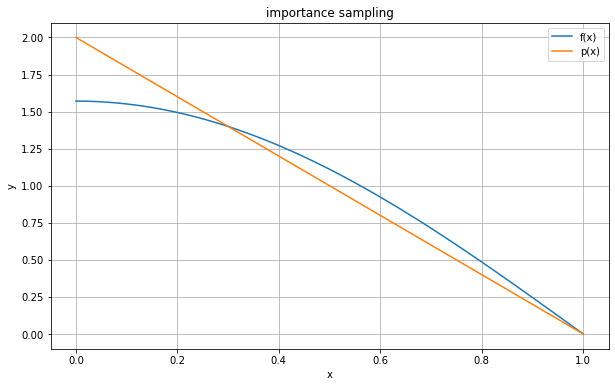

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x,y, label="f(x)")
plt.plot(x,2*(1-x), label="p(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("importance sampling")
plt.grid("True")
plt.legend()
plt.show()

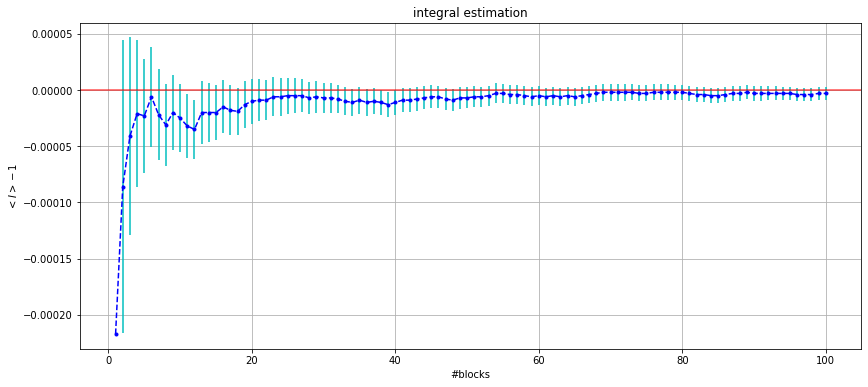

In [36]:
file=open('es1/I_imp_samp.csv')
x2,sum_prog2, err2=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)
N_block=100

plt.figure(figsize=(14,6))
plt.errorbar(x2/(np.max(x2)/N_block),sum_prog2-1,fmt='.--',color='blue',ecolor='c',yerr=err2)
plt.xlabel('#blocks')
plt.axhline(0,color='red', alpha=0.4)
plt.ylabel(f'$<I>-1$')
plt.title("integral estimation")
plt.axhline(0,color='red', alpha=0.4)
plt.grid(True)
plt.show()

### Importance Sampling 2

La nuova distribuzione di probabilità p(x) è
$$
p(x)=\frac{3}{2}(1-x^2)
$$

Per campionare x uso il metodo accept reject.

Essendo più simile (in forma) alla funzione originale f(x) mi aspetto che sia quella con errore più basso

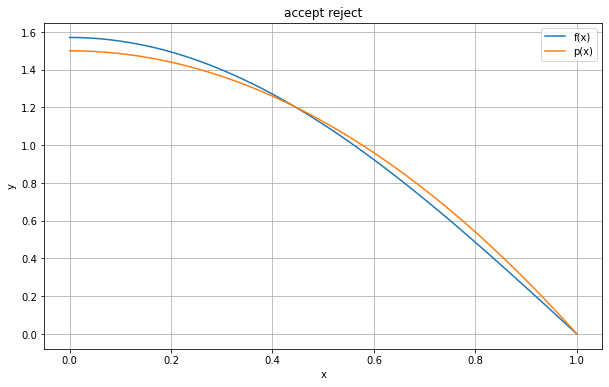

In [28]:
plt.figure(figsize=(10,6))
plt.plot(x,y, label="f(x)")
plt.plot(x,3/2*(1-x**2), label="p(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("accept reject")
plt.grid("True")
plt.legend()
plt.show()

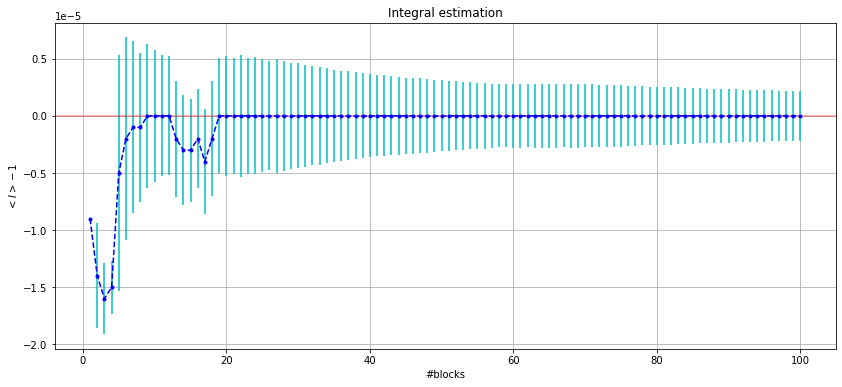

In [40]:
file=open('es1/I_imp_samp2.csv')
x3,sum_prog3, err3=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)
N_block=100

plt.figure(figsize=(14,6))
plt.errorbar(x3/(np.max(x3)/N_block),sum_prog3-1,fmt='.--',color='blue',ecolor='c',yerr=err3)
plt.xlabel('#blocks')
plt.title("Integral estimation")
plt.axhline(0,color='red', alpha=0.4)
plt.ylabel(f'$<I>-1$')
plt.grid(True)
plt.show()

#### Grafici di confronto degli errori all'aumentare dell numero di blocchi

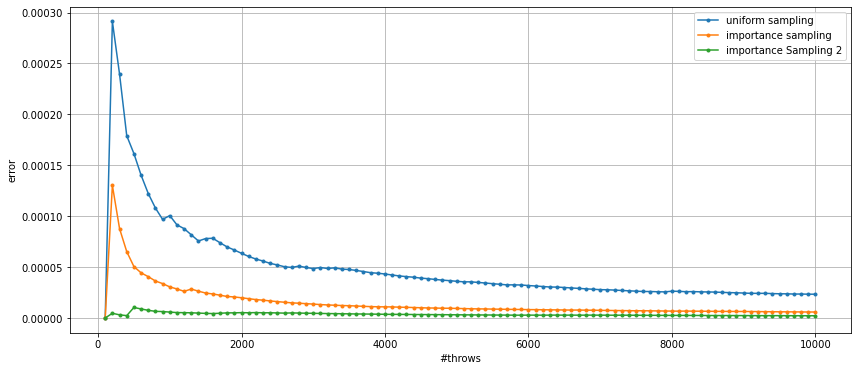

In [35]:
plt.figure(figsize=(14,6))
plt.plot(x,err,'.-', label="uniform sampling")
plt.plot(x2,err2,'.-', label="importance sampling")
plt.plot(x3,err3,'.-',label="importance Sampling 2")
plt.legend()
plt.xlabel('#throws')
plt.grid(True)
plt.ylabel('error')
plt.show()

Il risultato computazionale è compatibile con quello teorico per tutti i metodi utilizzati. Il metodo di importance sampling, e in particolare l'utilizzo di una distribuzione di probabilità più simile a $f(x)$, migliora il calcolo dell'integrale (come ci si aspettava). 

## Esercizio 2.2: Random Walk

- Numero di passi:  N_steps=100
- Numero di blocchi:  N_blocks=100
- Lunghezza del passo:  d=1

Calcolo la distanza media e l'errore associato di un Ranodom Walk discreto e continuo in 3 dimensioni all'aumentare del numero di passi.

Successivamente provo a interpolare i dati con una funzione $f(N)$
$$
f(N)\propto \sqrt{N}
$$
con $N$, il numero di passi, sapendo che l'andamento teorico della distanza $D$ in funzione del numero di passi è $D(N)=d\sqrt{N}$

### Random Walk discreto

parametro ottimale d= 0.9991811029615669


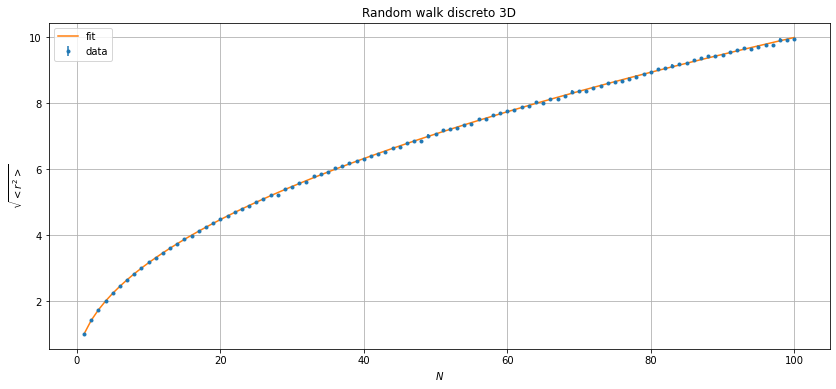

In [4]:
file=open('es2/discrete_RW.csv')
rw_discreto, err_discreto=np.loadtxt(file, delimiter=",", usecols=[0,1], unpack=True)

N_passi=len(rw_discreto)
passi=np.linspace(1,N_passi, N_passi)

def fit(N,k):
    return k*np.sqrt(N)

optimizedParameters1, pcov = opt.curve_fit(fit, passi, rw_discreto);
print("parametro ottimale d=",optimizedParameters1[0])

plt.figure(figsize=(14,6))
plt.errorbar(passi,rw_discreto,fmt='.', yerr=err_discreto, label='data')
plt.plot(passi, fit(passi, *optimizedParameters1), label="fit")
plt.xlabel(r'$N$')
plt.ylabel(r'$\sqrt{<r^2>}$')
plt.title("Random walk discreto 3D")
plt.grid(True)
plt.legend()
plt.show()

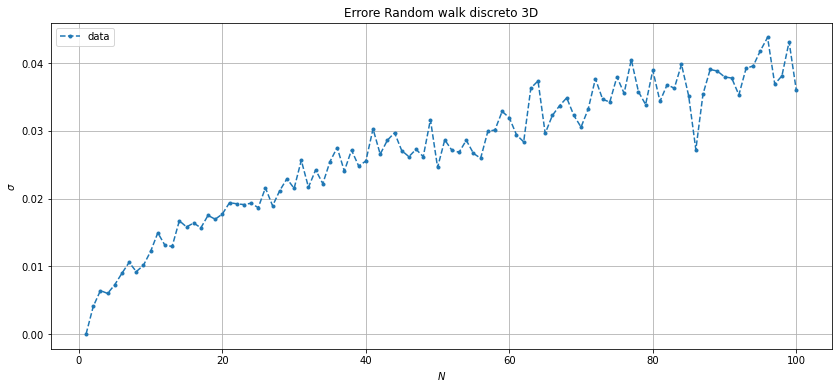

In [5]:
plt.figure(figsize=(14,6))
plt.plot(passi,err_discreto,'.--', label='data')
plt.xlabel(r'$N$')
plt.ylabel(r'$\sigma$')
plt.title("Errore Random walk discreto 3D")
plt.grid(True)
plt.legend()
plt.show()

Si osserva come il risultato computazionale è consistente con quello teorico sia per l'andamento della distanza all'aumentare del numero di passi (consistente con una legge di potenza con esponente $\frac{1}{2}$), sia per il coefficiente del fit che risulta essere estremamente vicino al valore scelto per il passo: $d=1$

### Random Walk Continuo

parametro ottimale d= 1.0003336857133793


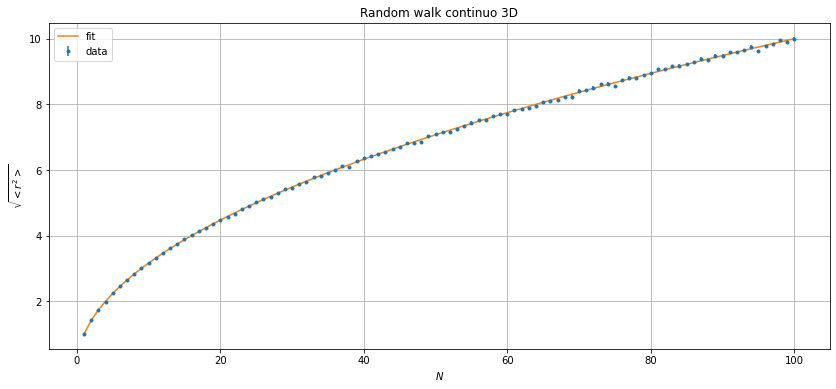

In [6]:
file=open('es2/continum_RW.csv')
rw_continuo, err_continuo=np.loadtxt(file, delimiter=",", usecols=[0,1], unpack=True)

N_passi=len(rw_continuo)
passi=np.linspace(1,N_passi, N_passi)

def fit(N,k):
    return k*np.sqrt(N)

optimizedParameters1, pcov = opt.curve_fit(fit, passi, rw_continuo);
print("parametro ottimale d=",optimizedParameters1[0])


plt.figure(figsize=(14,6))
plt.errorbar(passi,rw_continuo,fmt='.', yerr=err_continuo, label='data')
plt.plot(passi, fit(passi, *optimizedParameters1), label="fit")
plt.xlabel(r'$N$')
plt.ylabel(r'$\sqrt{<r^2>}$')
plt.title("Random walk continuo 3D")
plt.grid(True)
plt.legend()
plt.show()

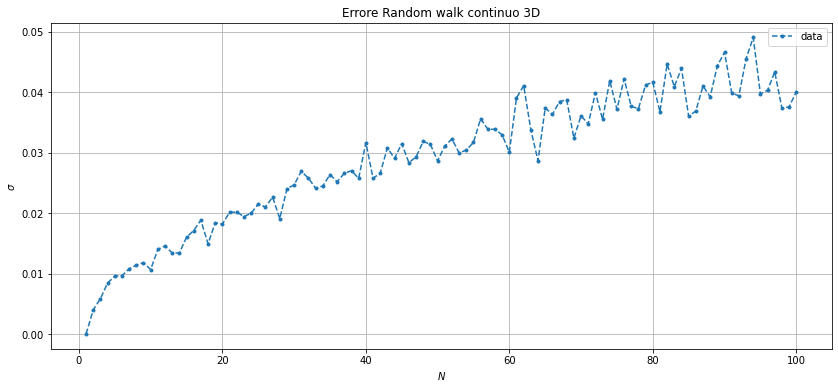

In [7]:
plt.figure(figsize=(14,6))
plt.plot(passi,err_continuo,'.--', label='data')
plt.xlabel(r'$N$')
plt.ylabel(r'$\sigma$')
plt.title("Errore Random walk continuo 3D")
plt.grid(True)
plt.legend()
plt.show()

I risultati nel caso continuo sono equivalenti a quelli del caso discreto
